### Aim
To implement a Neural Network with one hidden layer using Python and NumPy for binary classification on the Make Moons dataset.


In [1]:
# NumPy for numerical operations
import numpy as np
# Scikit-learn for dataset generation, scaling, and splitting
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Matplotlib for visualization
import matplotlib.pyplot as plt

In [2]:
# Create 1000 samples with noise to make the classification task more realistic
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
# Split data into training and testing sets (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

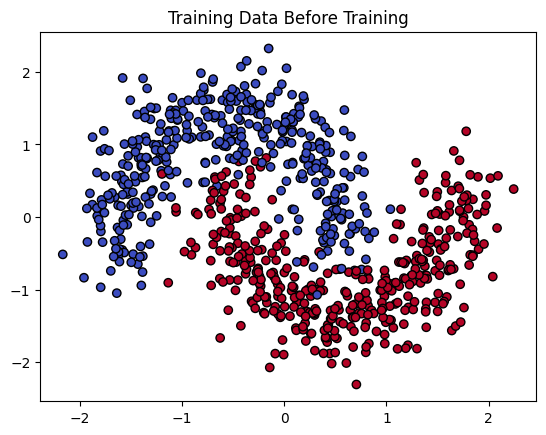

In [3]:
# Visualize the structure of the dataset before model training
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("Training Data Before Training")
plt.show()

In [4]:
# 4. Initializing the Neural Network Parameters
# Network architecture
input_size = X_train.shape[1]  # 2 features
hidden_size = 5                # Hidden layer with 5 neurons
output_size = 1         	# Output layer for binary classification

# Randomly initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [5]:
# Sigmoid activation function for output layer
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid (used in backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# 6. Forward and Backward Propagation
# Forward pass
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1        # Linear step for hidden layer
    A1 = np.tanh(Z1)               # Non-linear activation (tanh)
    Z2 = np.dot(A1, W2) + b2       # Linear step for output layer
    A2 = sigmoid(Z2)          # Sigmoid activation for binary output
    return Z1, A1, Z2, A2

# Backpropagation to update weights and biases
def backward_propagation(X, y, Z1, A1, Z2, A2, learning_rate=0.01):
    global W1, b1, W2, b2

    m = X.shape[0]  # Number of training examples

    # Compute gradients for output layer
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    # Compute gradients for hidden layer
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.tanh(Z1)**2)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2


In [7]:
# 7. Loss Calculation

def compute_loss(y, A2): 
    m = y.shape[0]
    return -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))


In [8]:
# 8. Training the Model

def train(X, y, epochs=1000, learning_rate=0.01):
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X)
        backward_propagation(X, y, Z1, A1, Z2, A2, learning_rate)

        if epoch % 100 == 0:
            loss = compute_loss(y, A2)
            print(f'Epoch {epoch}, Loss: {loss:.4f}')


In [9]:
# 9. Prediction Function

def predict(X):
    _, _, _, A2 = forward_propagation(X)
    return (A2 > 0.5).astype(int)


In [13]:
# 10. Model Training and Evaluation
# Train the model
train(X_train, y_train, epochs=2500, learning_rate=0.01)
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 0, Loss: 1.3051
Epoch 100, Loss: 1.3074
Epoch 200, Loss: 1.3097
Epoch 300, Loss: 1.3121
Epoch 400, Loss: 1.3144
Epoch 500, Loss: 1.3167
Epoch 600, Loss: 1.3191
Epoch 700, Loss: 1.3214
Epoch 800, Loss: 1.3237
Epoch 900, Loss: 1.3261
Epoch 1000, Loss: 1.3284
Epoch 1100, Loss: 1.3308
Epoch 1200, Loss: 1.3331
Epoch 1300, Loss: 1.3355
Epoch 1400, Loss: 1.3378
Epoch 1500, Loss: 1.3401
Epoch 1600, Loss: 1.3425
Epoch 1700, Loss: 1.3448
Epoch 1800, Loss: 1.3472
Epoch 1900, Loss: 1.3495
Epoch 2000, Loss: 1.3518
Epoch 2100, Loss: 1.3541
Epoch 2200, Loss: 1.3565
Epoch 2300, Loss: 1.3588
Epoch 2400, Loss: 1.3611
Test Accuracy: 0.9150


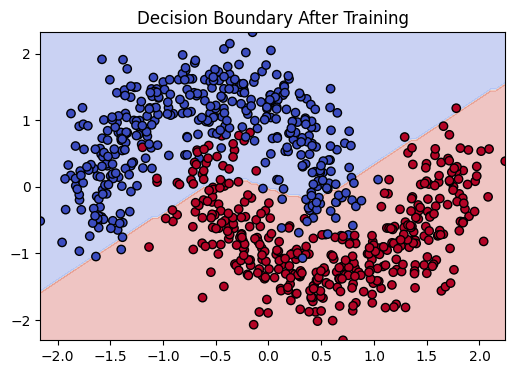

In [14]:
# 11. Visualizing the Decision Boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100),np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("Decision Boundary After Training")
plt.show()
